<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones bivariadas entre las variables a considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [5]:
# Utilice este espacio para escribir el código.

#Cargamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargamos y visualizamos la primeras observaciones de los datos
X = pd.read_csv('lugares.csv')
X.head()

,Ciudad,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [13]:
# Utilice este espacio para escribir el código.

# Información sobre el tipo de variables

X.info()

# Análisis  descriptivo de las variables

X.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Ciudad                                   329 non-null    object
 1   Clima y Terreno                          329 non-null    int64 
 2   Alojamiento                              329 non-null    int64 
 3   Cuidado de la salud y el medio ambiente  329 non-null    int64 
 4   Crimen                                   329 non-null    int64 
 5   Transporte                               329 non-null    int64 
 6   Educación                                329 non-null    int64 
 7   Artes                                    329 non-null    int64 
 8   Recreación                               329 non-null    int64 
 9   Economía                                 329 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.8+ KB


,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,538.732523,8346.559271,1185.738602,961.054711,4210.082067,2814.887538,3150.884498,1845.957447,5525.364742
std,120.808259,2385.262622,1003.002036,357.154186,1451.179240,320.792953,4642.283738,807.888171,1084.468523
min,105.000000,5159.000000,43.000000,308.000000,1145.000000,1701.000000,52.000000,300.000000,3045.000000
25%,480.000000,6760.000000,583.000000,707.000000,3141.000000,2619.000000,778.000000,1316.000000,4842.000000
50%,542.000000,7877.000000,833.000000,947.000000,4080.000000,2794.000000,1871.000000,1670.000000,5384.000000
75%,592.000000,9015.000000,1445.000000,1156.000000,5205.000000,3012.000000,3844.000000,2176.000000,6113.000000
max,910.000000,23640.000000,7850.000000,2498.000000,8625.000000,3781.000000,56745.000000,4800.000000,9980.000000


In [16]:
# CV de cada variable

# Calcular el Coeficiente de Variación
cv = X_subset.std() / X_subset.mean()

# Mostrar el resultado
print(cv)


Clima y Terreno                            0.224245
Alojamiento                                0.285778
Cuidado de la salud y el medio ambiente    0.845888
Crimen                                     0.371627
Transporte                                 0.344691
Educación                                  0.113963
Artes                                      1.473327
Recreación                                 0.437653
Economía                                   0.196271
dtype: float64


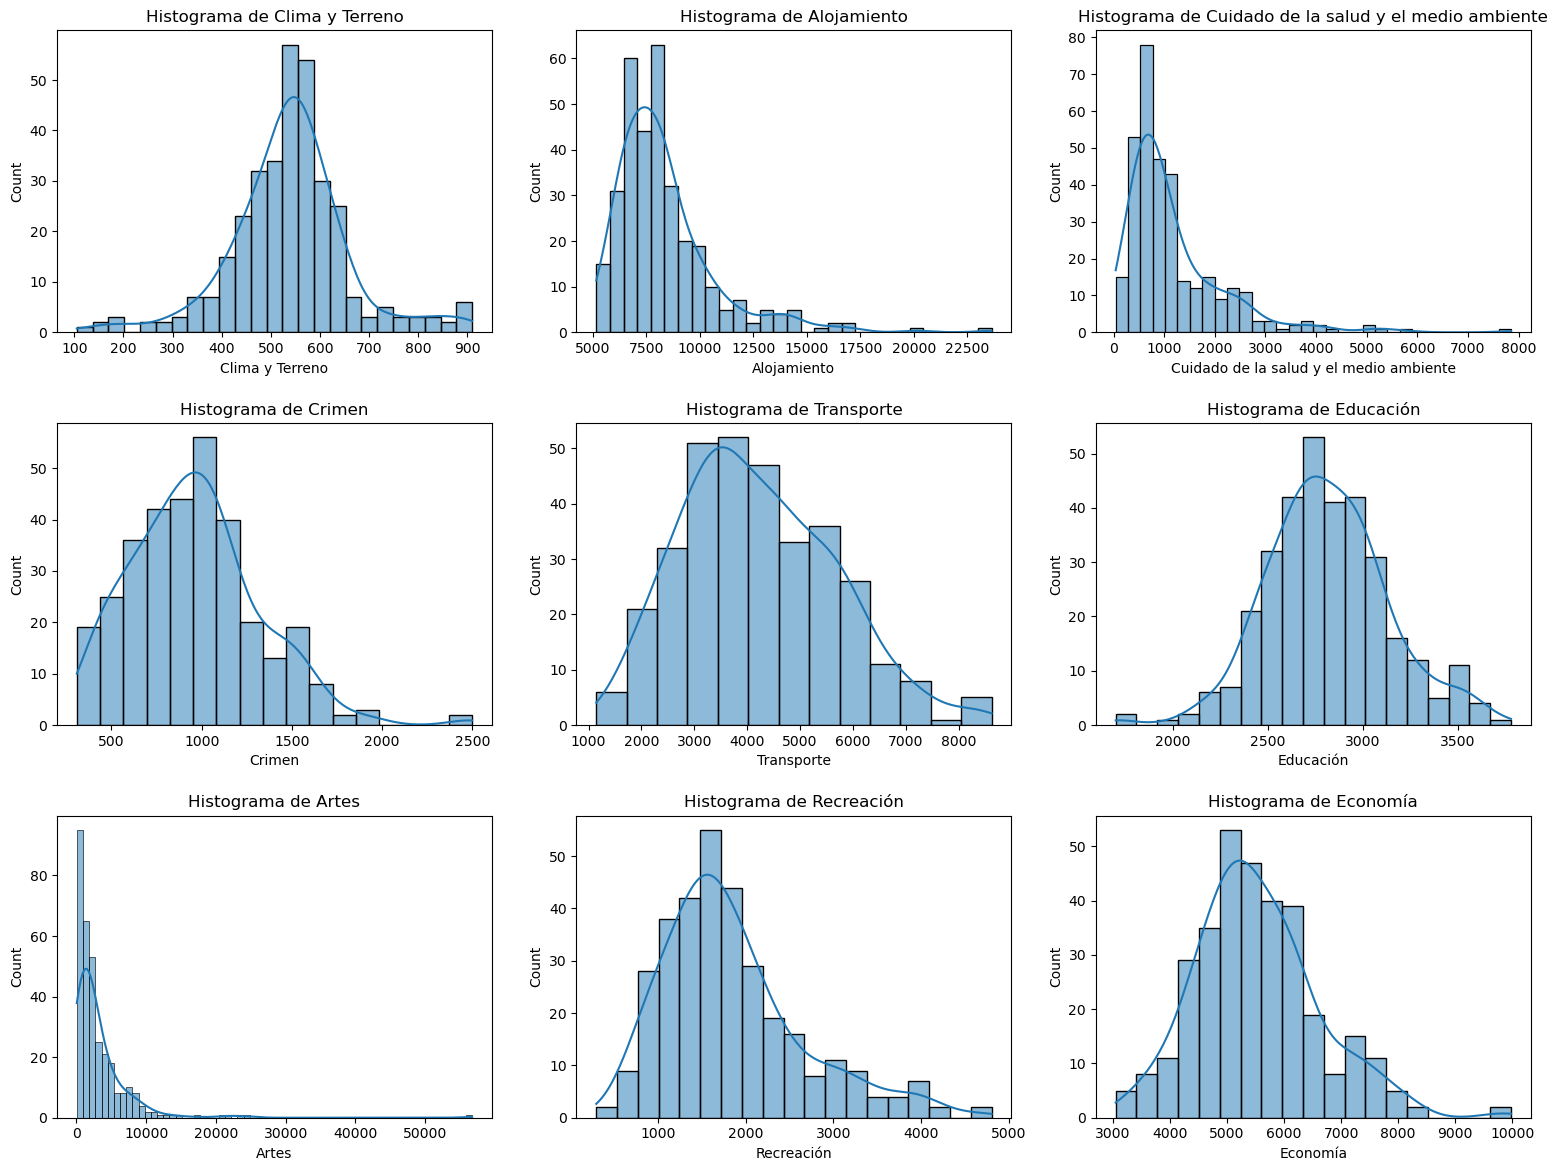

In [15]:
def plot_histograms(dataframe):
    # Get the column names of the DataFrame
    columns = dataframe.columns
    # Set up the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)
    # Set up the figure and axes
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, 4 * num_rows))
    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.3)  # Adjust vertical space between subplots
    # Flatten the 2D array of axes to simplify indexing
    axes = axes.flatten()
    # Loop through each column and plot the histogram
    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(dataframe[column], ax=ax, kde = True)
        ax.set_title(f'Histograma de {column}')
    # Remove empty subplots if needed
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes[i])     
    plt.show()

X_subset = X.iloc[:, 1:] 
plot_histograms(X_subset)

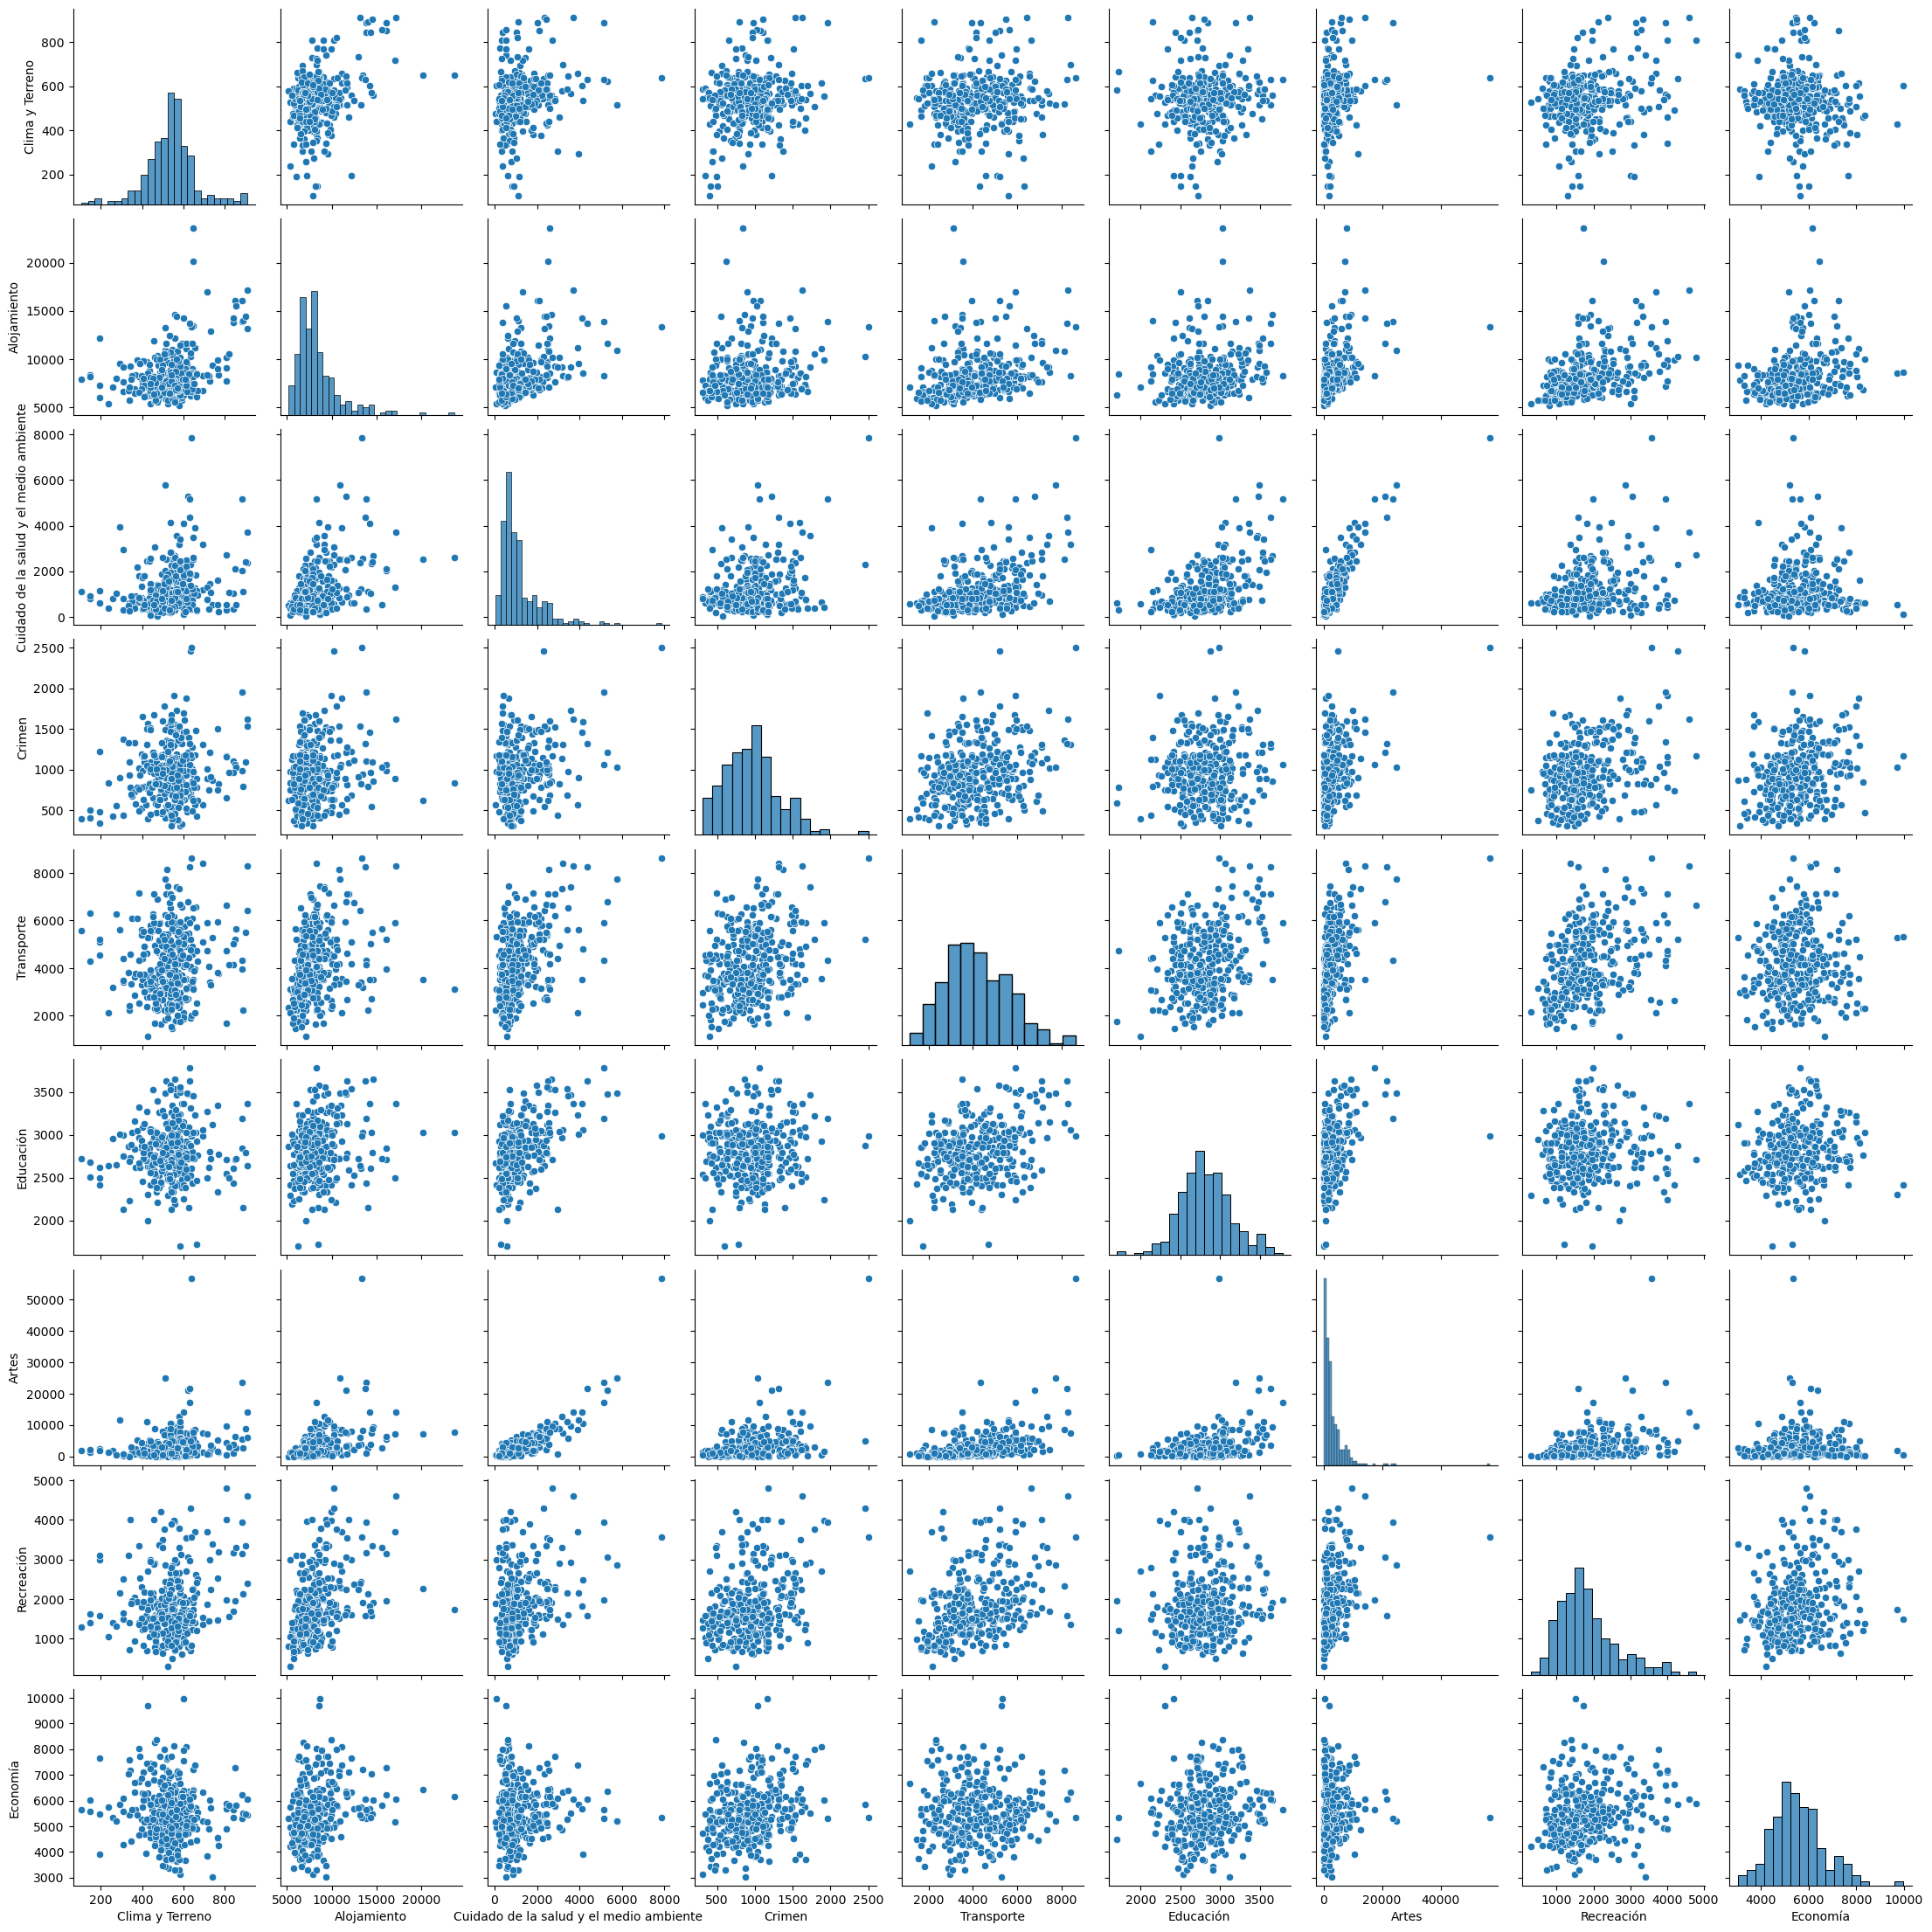

In [12]:
sns.pairplot(X_subset)

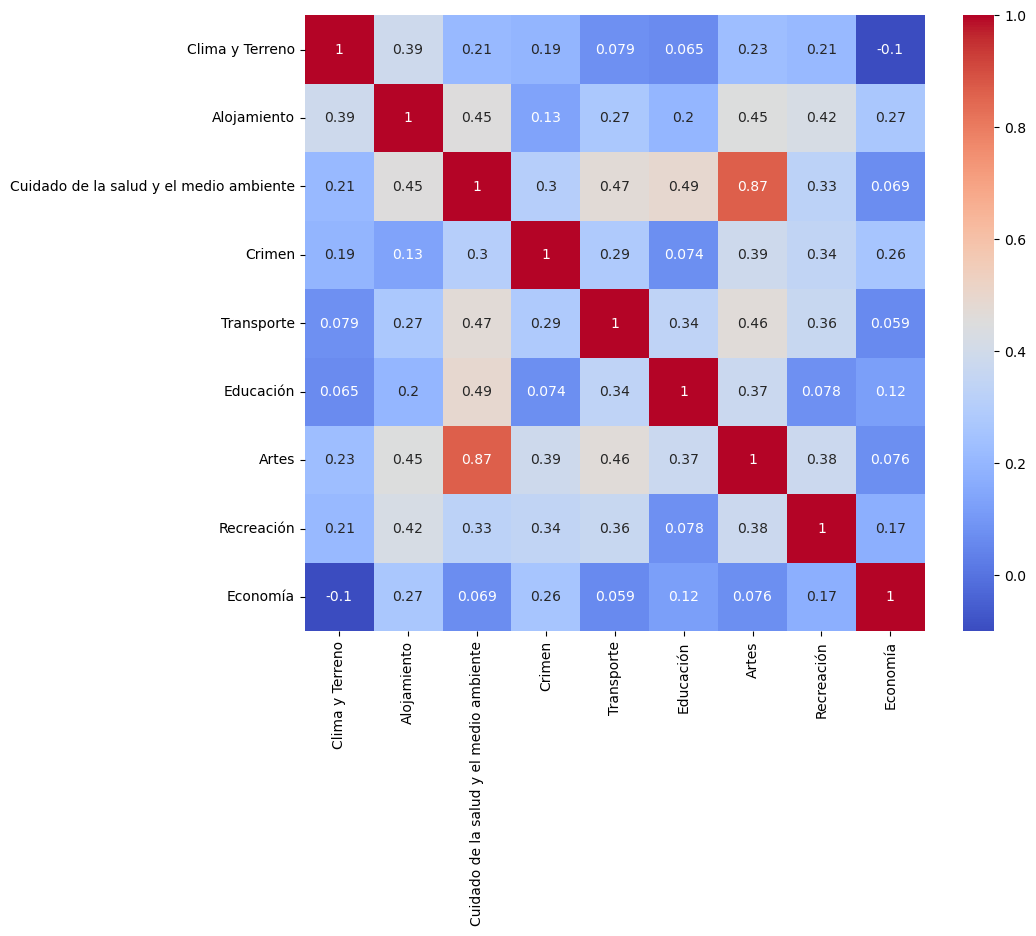

In [17]:
   
# Análisis de la correlactión

corr = X.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

Para realizar el anásis exploratorio de los datos recurrimos a resúmenes y gráficos que nos permitan observar cómo los datos se distribuyen para cada variable y cómo se relacionan entre sí. 

Observando las medidas resumen cómo la media, el mínimo, máximo y desvío estándar podemos ver que más alla de tratarse de calificaciones las maginitudes son distintas según la variable, los mínimos, máximos y promedios varian mucho entre las variables. Por este motivo creemos pertinente escalar el dataframe antes de buscar los componentes principales con los métodos vistos en el curso.

Al calcular el coeficiente de variación para cada variable descubrimos que las variables donde se ve una mayor variación son "Artes" (1.47), "Cuidado de la salud y el medio ambiente" (0.84) y "Recreación" (0.44).

En los histogramas podemos ver cómo algunas variables concentran los datos en los valores bajos mostrando una cola hacia la derecha, lo que indica que hay algunos valores extremos altos. Esto indica que la mayoria de las ciudades tiene baja calificación y solo algunas poseen calificación alta que impactan positivamente la calidad de vida. 

Estas variables son: "Alojamiento", "Cuidado de la salud y medio ambiente", y en mayor medida aún "Artes". Cabe aclarar que en el caso de "Alojamiento" esta información debe interpretarse de forma distinta porque en este caso a mayor calificación peor es la situación de la ciudad al respecto de esa variable. O sea que ese gráfico indica que la mayoria de las ciudades tienen valores bajos de calificacion respecto a "Alojamiento" lo que impacta positivamente la calidad de vida y hay menor cantidad de ciudades con valores altos de calificación, los cuales impactan negativamente la calidad de vida.

Las variables "Recreación" y "Crimen" muestran tambien una leve concentración hacia los valores bajos. Aqui la media es levemente mayor a la mediana, lo que implica que los datos se encuentra un poco más distribuidos entre valores bajos y altos pero hay más ciudades con valores bajos de calificación que ciudades con valores altos. 

En este caso también "Crimen" debe interpretarse de forma distinta. Para esta variable a menor puntaje mejor. Podemos observar en el grafica un algunos posibles datos extremos hacia la derecha lo que implica que hay unas pocas ciudades donde en "Crimen" tiene un impacto negativo en la calidad de vida.  

Las variables "Clima y Terreno", "Recreación", "Transporte", "Educación" y "Economía" muestran una distribución bastante normal, lo que implica que no se ven datos tan extremos a un lado y otro de la media. 

Luego de observar cada variable procedimos a explorar la relación entre variables a través de gráficos de dispersión bivariados y diagramas de correlación. Al tratarse de 9 variables para analizar la relación bivariada se requiere calcular las combinaciones de 9 en 2, lo que da cómo resultado 36 gráficos. 

Al osbervar los gráficos bivariados de dispersión solo se observa algún tipo de correlación para las variables "Cuidado de la salud y el medio ambiente" y "Artes" que se confirma con el mapa de calor mostrando una correlación de 0.87.

Con esta situacion de los datos estaremos atentos a elegir componentes principales que reflejen loadings altos en las variables con alto grado de variabilidad ya que estas deberían ser las que tienen un mayor impacto en la calidad de vida.


### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, pueden los pesos obtenidos identificar dimensiones menores de los datos? Provea una interpretación a estas dimensiones, para ello puede utilizar gráficas y/o tablas.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).